In [1]:
#Objective is to create a ML model to predict the weight of a person on the basis of gender and height using linear regression

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\choco\OneDrive\Desktop\python\weight-height.csv')
df.head(1)

,Gender,Weight,Height
0,Male,73.847017,241.893563


In [7]:
df.shape

(10000, 3)

In [8]:
df.isnull().sum()

Gender    0
Weight    0
Height    0
dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

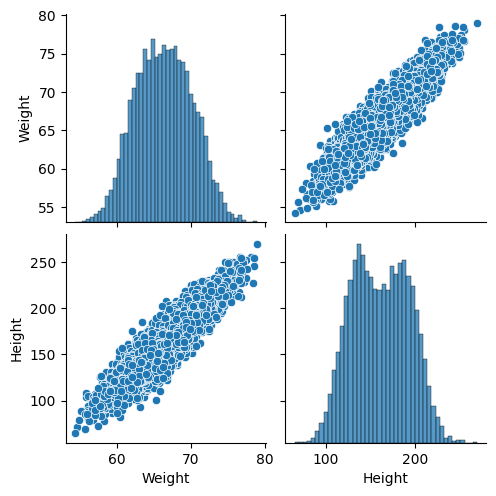

In [10]:
sns.pairplot(df)
#linear data

In [11]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols='Gender')
df=encoder.fit_transform(df)
df.head()

,Gender,Weight,Height
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [12]:
x=df.drop('Weight',axis=1)
y=df['Weight']
x.head(2)

,Gender,Height
0,1,241.893563
1,1,162.310473


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(x_test)
y_pred

array([63.97801621, 69.07096077, 72.64788738, ..., 65.73574039,
       66.95413365, 66.44526544])

In [17]:
y_test[:5]

9394    64.723877
898     67.272171
2398    74.520972
5906    65.880014
2343    64.846301
Name: Weight, dtype: float64

In [18]:
model.score(x_test,y_test)

0.864642597342521

In [19]:
model.score(x_train,y_train)

0.8599514575741888

In [20]:
model.coef_

array([0.94967818, 0.1226242 ])

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
r2_score(y_test,y_pred)

0.864642597342521

In [22]:
mean_absolute_error(y_test,y_pred)

1.139791133868113

In [23]:
mean_squared_error(y_test,y_pred)

1.9992881476324857

In [24]:
root_mean_squared_error(y_test,y_pred)

1.4139618621562908

In [25]:
#predicting weight by giving value

In [26]:
my_weight=model.predict([[0,174]])
print('My predicted weight=',my_weight)


My predicted weight= [66.48261049]


C:\Users\choco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#if we used scaling we have to multiply it
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x=[[0,174]]
#x_scaled=scaler.transform(x)
#y_pred=linear.predict(x_scaled)
#print('My Predicted Weight= ',y_pred)

In [28]:
model.coef_

array([0.94967818, 0.1226242 ])